# Morphological Image Processing

The emphasis now is not on individual pixel values (Like in filtering) but how they are co-related to each other. 

A collection of non-linear operations related to the shape or morphology of features in an image.

***ROI***: Region Of Interest in white, whereas background in black or vice versa.

Example:
- Background seperation 
- Document analysis

We will do on binary images.

**>** Go try on grayscale later.

### Operation On Binary Images
- A | B : Union
- A & B : Intersection
- A & ^B : A U B'
And many more.

### Kernels / Structuring Element

Same as what was used in filtering, now a combination of 0's and 1's since binary images have only 0 and 1. Center pixel is the actionable pixel.

Has varying sizes, zero or empty spots means ***Don't Care***, **1** represents a part of the shape you are looking for.

Types:
- Box

$$
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 
\end{bmatrix}
$$

- Disc

$$
\begin{bmatrix}
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0 
\end{bmatrix}
$$



In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
# This is to show plotly graphs on GitHub
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

### Erosion 

Like an ***AND*** operation. Where both filter and image are **1** then the result is labelled **1**. 

The output depends on the shape of the structuring element and the origin of the image and structuring element.

The size of the foreground is reduced by erosion.

Example:
- Coin Counting

  Select the coins using background elimination and then use DFS to count non-connected componants 

- Noise Reduction

  Threshold and then erode generally, with a structure that fits the image.


**>** I think the result image tries to imitate the shape of the structuring element. Not sure, read this.

### Dilation

Like an ***OR*** operation. Where either filter and image are **1** then the result is **1**. 

So wherever the structuring element touches the image, the result pixel is **1** there.

The size of the object is grown by dilation.



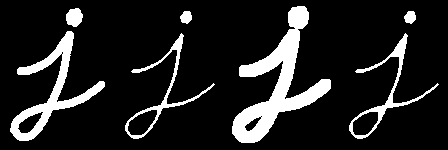

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/j.png', cv2.IMREAD_GRAYSCALE)
# Box kernel
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(I,kernel,iterations = 1)
dilation = cv2.dilate(I,kernel,iterations = 1)

# Two iterations of erosion after dilation
erosion2 = cv2.erode(dilation,kernel,iterations = 2)

cv2_imshow(np.hstack([I, erosion1, dilation, erosion2]))

###Boundary Extraxtion

1. Original minus the eroded image gives the boundary.

2. Dilate the image then subtract the original image to obtain the boundary.



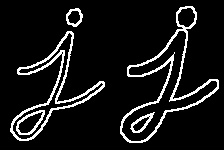

In [0]:
# Two ways of obtaining boundary
cv2_imshow(np.hstack([I - erosion1, dilation - I]))

### Opening 

### ***Erosion followed by Dilation***

All object pixels that donot match with the structureing element are eroded away and then the remaining object/ foraground is enhanced via dilation.

Hence structuring element resembles the shape of whatever we want to preserve in the foreground/ object.

***Excercise!***

How to covert a bunch of sticks converted to seperate horizontal and vertical lines where the width of the lines is three pixels.

Hence there must be three columns of ones!
For vertical sticks, I have chosen a 5 x 5 filter.

$$
\begin{bmatrix}
0 & 1 & 1 & 1 & 0\\
0 & 1 & 1 & 1 & 0\\
0 & 1 & 1 & 1 & 0\\
0 & 1 & 1 & 1 & 0\\
0 & 1 & 1 & 1 & 0
\end{bmatrix}
$$



In [0]:
# Complete the sticks excercise

### Closing

### ***Dilation Followed By Erosion***

All object pixels that match with the structuring element are enhaced and then the remaining objects are eroded away via dilation.

Hence structuring element resembles the shape of whatever we want to preserve in the background.




Text(0.5, 1.0, 'Morphologically Closed')

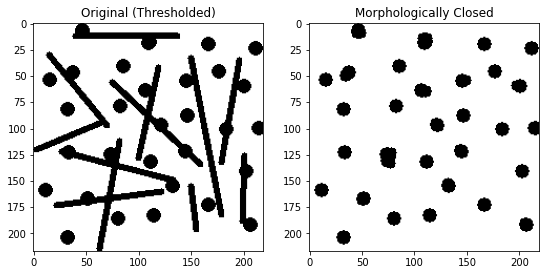

In [0]:
fp = cv2.imread("/content/drive/My Drive/Image Processing/closing_disks.png", cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(fp, 127, 255, cv2.THRESH_BINARY_INV)

kernel = morp.disk(5, dtype='uint8')
# print(kernel)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# erodedVertical = cv2.erode(thresh, kernel, 1)

fig = plt.figure(figsize = (14,5))
plt.subplot(131)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_RGB2BGR))
plt.title("Original (Thresholded)")
plt.subplot(132)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_RGB2BGR))
plt.title("Morphologically Closed")

Text(0.5, 1.0, 'Morphologically Closed (Horizontal)')

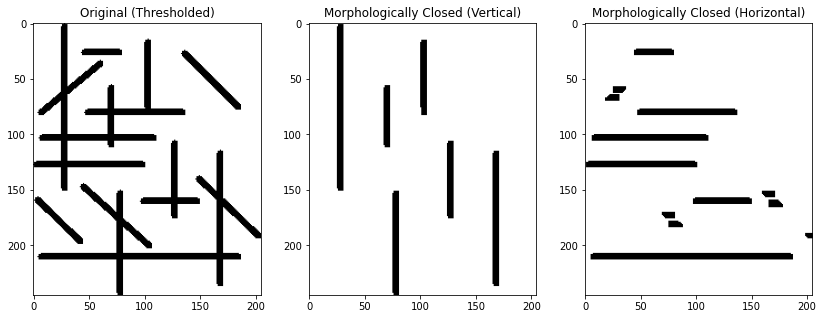

In [0]:
fp = cv2.imread("/content/drive/My Drive/Image Processing/closing_sticks.png", cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(fp, 127, 255, cv2.THRESH_BINARY_INV)

kernelV = np.array([[1, 1 ,1], 
                   [1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.uint8)
kernelH = kernelV.transpose()
# print(kernel)

closingV = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernelV)
closingH = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernelH)

fig = plt.figure(figsize = (14,5))
plt.subplot(131)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_RGB2BGR))
plt.title("Original (Thresholded)")
plt.subplot(132)
plt.imshow(cv2.cvtColor(closingV, cv2.COLOR_RGB2BGR))
plt.title("Morphologically Closed (Vertical)")
plt.subplot(133)
plt.imshow(cv2.cvtColor(closingH, cv2.COLOR_RGB2BGR))
plt.title("Morphologically Closed (Horizontal)")

Used for:
### Noise Removal During Thresholding

After seperating the image into two colours using the thresholding operation the object is enhanced and the remaining noise will be eroded away.

[[1 1 1]
 [1 1 1]
 [1 1 1]]


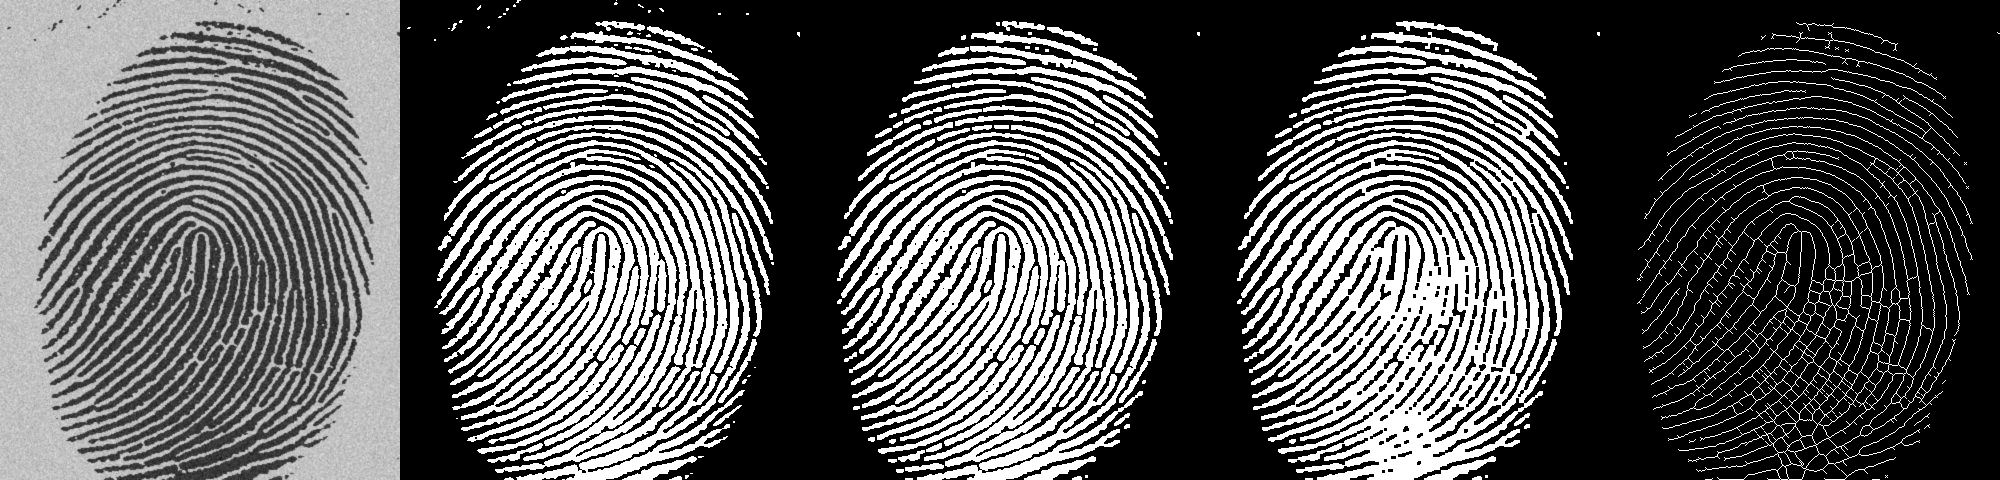

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the image
returned, binary = cv2.threshold(I, 125, 255, cv2.THRESH_BINARY_INV)

# Defined structuring element
kernel = morp.square(3, dtype='uint8')
print (kernel)

# Opening fills the white noise on the top
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Closing connects the different lost print parts
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Skeletonisation is anothore morphological, one pixel wisth skeleton is obtained
# Requires image to lie between 0 to 1
closing2 = closing/255
final = morp.medial_axis(closing2) * 255
cv2_imshow(np.hstack([I, binary, opening, closing, final]))

### Hit And Miss Transform

Extract pixels with specific neighborhood binary configurations. Uses two kernels:

- $B_1$: Required Foreground 
- $B_2$: Required Background
- $A$: Image

$\ominus$ is erosion. 

The operation is,

$$
  A\otimes B = (A \ominus B_1)\cap(A' \ominus B_2)
$$

Erode $A$ with $B_1$ and then take negateive of $A$ to get $A'$ and then erode $A'$ with $B_2$ and then combine the two using intersection.

All can be done using two structuring elements of:
- $0$: Dont Care
- $1$: Foreground/ Object
- $-1$: Background / Should not be in foreground

### Hit And Miss Applications

**>** Read this and finish it, very confused.

**>** Why are erode and dilate different fuction in cv2, isnt the difference in the kernel we apply. They should just be doing convolution right? 

### **Erosion**

Take $B_1$ as the erosion kenel and erode $A$ and $B_2$ as the identity structuring element, that is the center is one.

### **Dilation**

Take $B_1$ as the is the identity element and then erode $A'$ with $B_2$.

### **Opening**
Erosion then dilation
### **Closing**
Dilation then erosion


[[1 1 1]
 [1 1 1]
 [1 1 1]]


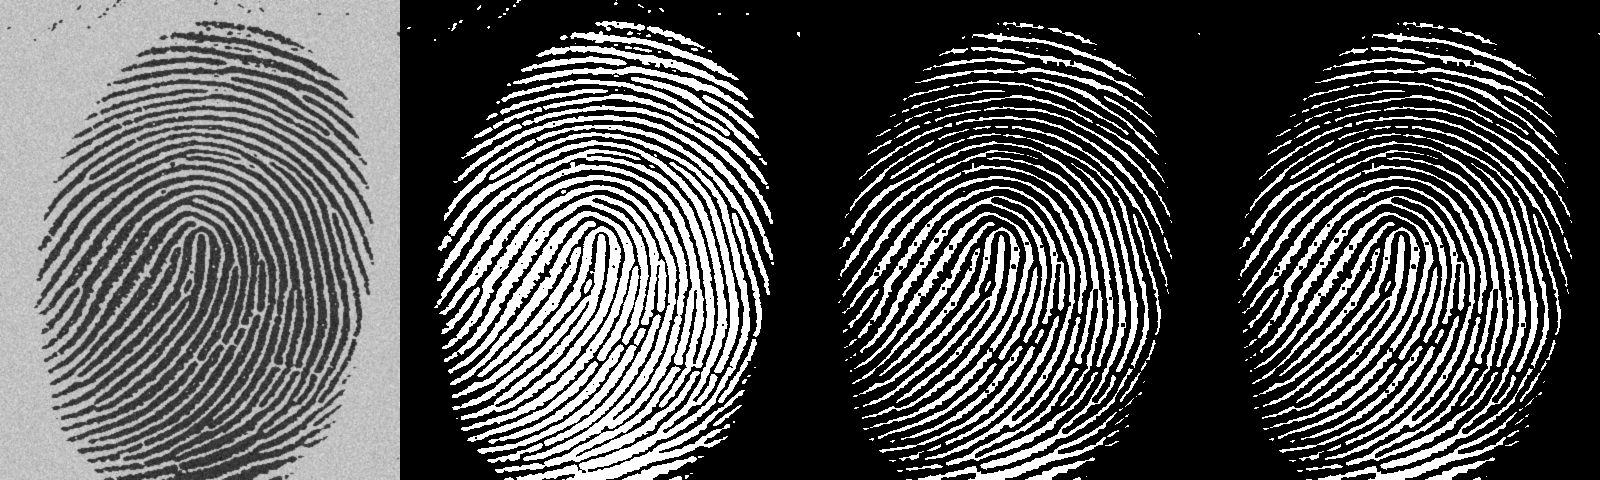

(480, 400)

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the image
returned, binary = cv2.threshold(I, 125, 255, cv2.THRESH_BINARY_INV)

# Defined structuring element
kernel = morp.square(3, dtype='uint8')
print (kernel)
erosionOne = cv2.erode(binary, kernel,iterations = 1)

identity = np.array([[0, 0 ,0], 
                     [0, 1, 0],
                     [0, 0, 0]], dtype=np.uint8)
erosionA = cv2.erode(binary, kernel, iterations = 1)
erosionADash = cv2.erode(255 - binary, identity, iterations = 1)
hitandmiss = (cv2.bitwise_and(erosionA/255, 1 - erosionADash/255))*255

# cv2_imshow(np.hstack([I, binary, 255 - binary, erosionOne, hitandmiss]))
cv2_imshow(np.hstack([I,  binary, erosionOne, hitandmiss]))
# cv2_imshow(np.hstack([erosionOne, erosionA, erosionADash, hitandmiss]))
binary.shape

[[1 1 1]
 [1 1 1]
 [1 1 1]]


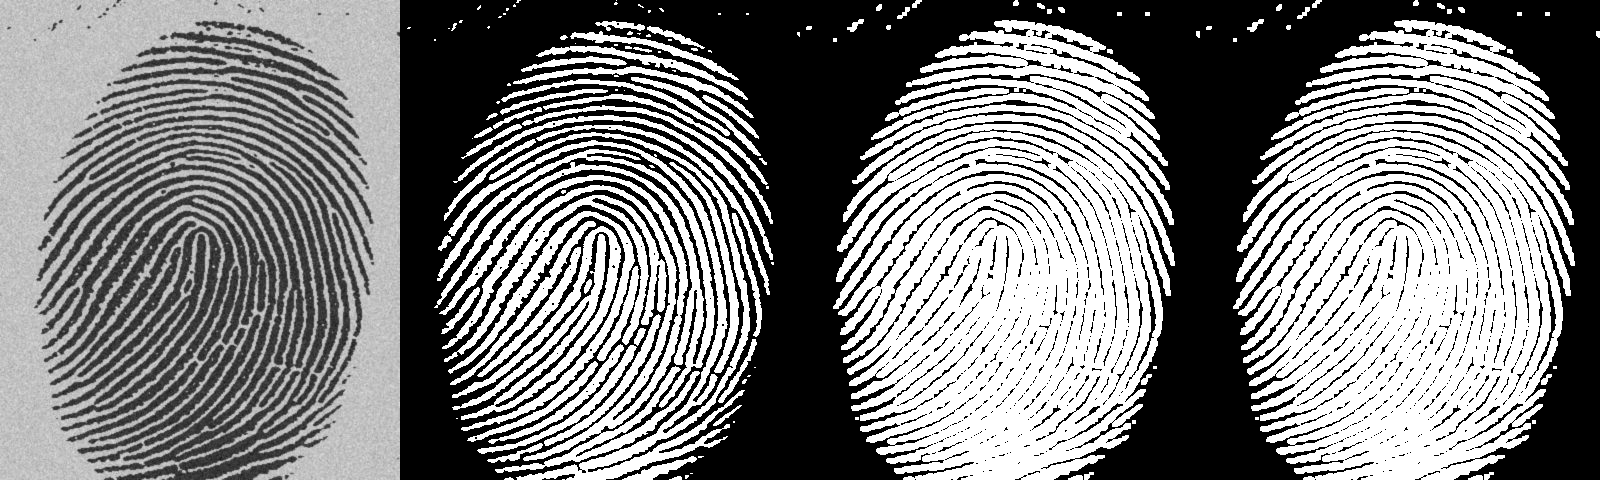

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the image
returned, binary = cv2.threshold(I, 125, 255, cv2.THRESH_BINARY_INV)

# Defined structuring element
kernel = morp.square(3, dtype='uint8')
print (kernel)
dilationOne = cv2.dilate(binary, kernel,iterations = 1)

identity = np.array([[0, 0 ,0], 
                     [0, 1, 0],
                     [0, 0, 0]], dtype=np.uint8)
erosionA = cv2.erode(binary, identity, iterations = 1)
erosionADash = cv2.erode(255 - binary, kernel, iterations = 1)
hitmiss_dilation = (cv2.bitwise_or(erosionA, 255 - erosionADash))

# cv2_imshow(np.hstack([I, binary, 255 - binary, dilationOne, hitmiss_dilation]))
cv2_imshow(np.hstack([I, binary, dilationOne, hitmiss_dilation]))
# cv2_imshow(np.hstack([dilationOne, erosionA, 255 - erosionADash, hitmiss_dilation]))


### Single Matrix

Performing hit and miss using a single kernel $B$ using a matrix of -1, 0  and 1.

***Think!**

What to do to isolate a single point using hit and miss?
We would use the $B$ matrix as follows,
$$
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 1 & -1 \\
-1 & -1 & -1
\end{bmatrix}
$$

***Excercise!***

Write a script which reads $coin.jpg$ as input and outputs a new image containing:

1. Only the coins touching the boundary of the image

2. Only the coins which overlap with each other

3. Only non-overlapping coins



Text(0.5, 1.0, 'Dilated')

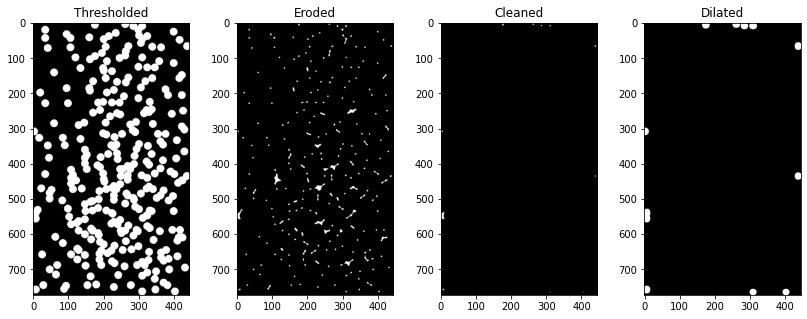

In [0]:
img = cv2.imread("/content/drive/My Drive/Image Processing/coins.jpg", cv2.IMREAD_GRAYSCALE)
junk, thresh = cv2.threshold(fp, 127, 255, cv2.THRESH_BINARY)

kernel = morp.disk(9, dtype=np.uint8)
# print(kernel)

eroded = cv2.erode(thresh, kernel, iterations = 1)
cleaned = cv2.erode(thresh, kernel, iterations = 1)

# Diameter of a coin is 9 pixels
cleaned[9:cleaned.shape[0] - 9, 9:cleaned.shape[1] - 9] = 0

dilated = cv2.dilate(cleaned, kernel, iterations = 1)

fig = plt.figure(figsize = (14,5))
plt.subplot(141)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_RGB2BGR))
plt.title("Thresholded")
plt.subplot(142)
plt.imshow(cv2.cvtColor(eroded, cv2.COLOR_RGB2BGR))
plt.title("Eroded")
plt.subplot(143)
plt.imshow(cv2.cvtColor(cleaned, cv2.COLOR_RGB2BGR))
plt.title("Cleaned")
plt.subplot(144)
plt.imshow(cv2.cvtColor(dilated, cv2.COLOR_RGB2BGR))
plt.title("Dilated")

In [0]:
# Finish this 
# Hit and miss to get coins as coins

***Excercise!***

Read the image $objects.png$ and try to answer the following questions using code

1. How many objects have one or more holes?

2. How many square objects are in the image?

3. Identify the square objects that have holes.

4. Identify the circular objects that have no holes.

In [0]:
# Finish this 

### Connected Component Labelling

Scans image and groups based on pixel connectivity: (Same pixel intensity/ Some way connected to each other)

Based on directions,
- $4$ $connected$
- $8$ $connected$

### **Two Pass Algorithm**

Colour the picture, travese by pixels row-wise. If adjacent to a colour it takes the same colour.

Maintain a ***DSU***: Disjoint Set Union where parent-child pairs exist, the children then take the colours of the parents during the second pass.

***DSU*** finding operates in $O(1)$

Basically all colours must be parents. The number of colours will now give the number of connected components.

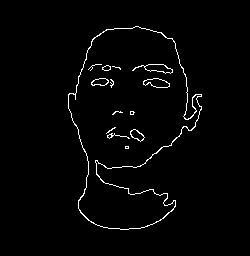

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


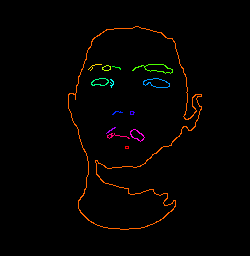

In [0]:
img = cv2.imread('/content/drive/My Drive/Image Processing/facetwopass.jpg', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # Ensure binary
num_labels, labels_im = cv2.connectedComponents(img)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179 * labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # CV to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set background label to black
    labeled_img[label_hue==0] = 0

    cv2_imshow(labeled_img)
    cv2.waitKey()
cv2_imshow(img)
imshow_components(labels_im)